# EC-02 N-Queen Puzzle

Affandy Fahrizain - J42322c

In [1]:
from deap import tools, base
from deap import creator, algorithms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
creator.create('BaseFitness', base.Fitness, weights=(-1.0,))
creator.create('Individual', np.ndarray, fitness=creator.BaseFitness)

In [69]:
# data viz
def draw_log(log):
    gen_list, avg_list, std_list, max_list, min_list = read_log(log)
    plt.plot(gen_list, avg_list, label="avg")
    plt.plot(gen_list, min_list, label="min")
    plt.plot(gen_list, max_list, label="max")
    plt.fill_between(gen_list, avg_list-std_list, avg_list+std_list, alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()

def read_log(log):
    avg_list = list()
    std_list = list()
    min_list = list()
    max_list = list()
    gen_list = list()
    for g in log:
        avg_list.append(g['avg'])
        std_list.append(g['std'])
        min_list.append(g['min'])
        max_list.append(g['max'])
        gen_list.append(g['gen'])
    return np.array(gen_list), np.array(avg_list), np.array(std_list), np.array(max_list), np.array(min_list)

def populate_board(individual, n_size):
    # init empty board
    board = np.zeros((n_size,n_size), dtype=int)    
    # populate queen
    for row, i in zip(board[::-1], individual):
        row[i] = 1
    
    return board

def visualize_board(board):
    for b in board:
        print(' '.join(['{:<3}'.format('Q') if i == 1 else '{:<3}'.format('x') for i in b]))

In [70]:
# factory
def generate_queen(n_queen=8):
    indices = np.arange(n_queen)
    np.random.shuffle(indices)
    return indices

def generate_queen_2(n_queen=8):
    return np.random.randint(0, n_queen, n_queen)

In [116]:
# evaluate function
def evaluate(individual, n_size):
    # get board map
    board = populate_board(individual, n_size)

    conflict = 0
    # check horizontal
    sum_hor = np.sum(board, axis=1)
    sum_hor = np.sum([it-1 if it > 1 else 0 for it in sum_hor])     # filter and final sum
    conflict += sum_hor

    # check vertical
    sum_vert = np.sum(board, axis=0)
    sum_vert = np.sum([it-1 if it > 1 else 0 for it in sum_vert])     # filter and final sum
    conflict += sum_vert

    # check diagonal
    diags = np.arange((n_size-1)*-1, n_size)   # handle above and below main diagonal
    ## right diagonal
    sum_rdiags = [np.sum(np.diag(board, k)) for k in diags]     # get all diagonals and sum it elements
    sum_rdiags = np.sum([it-1 if it > 1 else 0 for it in sum_rdiags])     # filter and final sum
    conflict += sum_rdiags
    ## left diagonal
    sum_ldiags = [np.sum(np.diag(np.fliplr(board), k)) for k in diags]
    sum_ldiags = np.sum([it-1 if it > 1 else 0 for it in sum_ldiags])
    conflict += sum_ldiags

    return conflict,

In [117]:
# params
N_SIZE = 16
POP_SIZE = 100

In [135]:
# setup
toolbox = base.Toolbox()
toolbox.register('map', map)
toolbox.register('generate_hard', generate_queen_2, n_queen=N_SIZE)
toolbox.register('individual', tools.initIterate, creator.Individual, toolbox.generate_hard)
toolbox.register('population', tools.initRepeat, list, toolbox.individual, POP_SIZE)
toolbox.register('mate', tools.cxUniformPartialyMatched, indpb=0.25)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=1/N_SIZE)
toolbox.register('select', tools.selTournament, tournsize=4)
toolbox.register('evaluate', evaluate, n_size=N_SIZE)

In [141]:
# hyperparams
cross_prob = 0.97
mut_prob = 0.35
iteration = 1000

# run
pop = toolbox.population()
hof = tools.HallOfFame(3, np.array_equal)
stats = tools.Statistics(lambda ind: ind.fitness.values[0])
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=cross_prob,
                                 mutpb=mut_prob, ngen=iteration,
                                 stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg 	std    	min	max
0  	100   	13.4	2.42487	7  	19 
1  	97    	11.4	2.0347 	5  	16 
2  	97    	10.73	2.32747	6  	16 
3  	95    	9.78 	1.88987	6  	16 
4  	98    	9    	1.74356	6  	14 
5  	99    	8.64 	1.67642	5  	14 
6  	94    	8.48 	1.78034	5  	14 
7  	100   	8.31 	2.10093	5  	13 
8  	100   	7.73 	1.94348	3  	13 
9  	94    	7.39 	1.92819	3  	12 
10 	99    	6.87 	2.11497	2  	12 
11 	97    	6.72 	1.89779	3  	14 
12 	98    	6.25 	2.03162	2  	10 
13 	98    	6.32 	1.94874	3  	10 
14 	98    	6.14 	1.72638	2  	11 
15 	97    	5.92 	2.0034 	2  	13 
16 	98    	5.65 	1.69926	1  	10 
17 	96    	5.54 	1.99208	2  	10 
18 	98    	4.69 	1.89576	2  	10 
19 	98    	4.04 	1.91792	1  	9  
20 	97    	3.44 	1.63902	1  	8  
21 	97    	3.35 	1.61478	1  	9  
22 	100   	3.07 	1.51165	1  	8  
23 	100   	3.09 	1.63153	1  	11 
24 	98    	2.89 	1.63643	1  	9  
25 	100   	2.72 	1.64365	1  	9  
26 	98    	2.46 	1.57747	0  	7  
27 	100   	2.44 	1.62678	0  	9  
28 	98    	2.54 	1.93608	0  	8  
29 	98    	2.

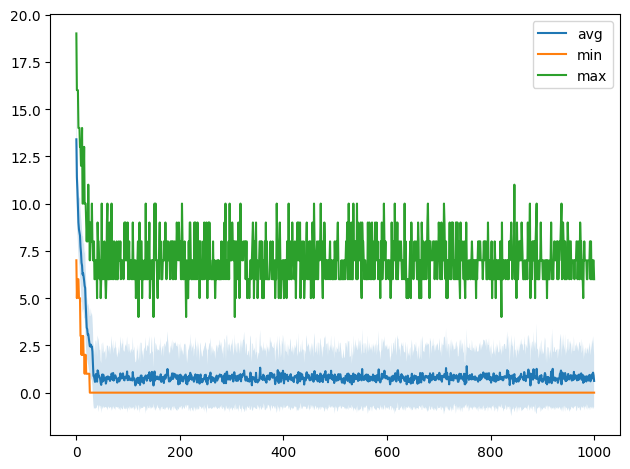

In [142]:
draw_log(log)

In [143]:
# best individual
best = hof[0]
board = populate_board(best, N_SIZE)
print(f'Numer of conflict: {toolbox.evaluate(best)}')
visualize_board(board)

Numer of conflict: (0,)
x   x   x   x   x   x   x   x   x   x   x   Q   x   x   x   x  
x   x   x   x   x   x   x   x   x   x   x   x   x   Q   x   x  
x   x   x   x   Q   x   x   x   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   x   x   x   x   Q   x   x   x   x   x  
x   x   x   x   x   x   x   x   x   x   x   x   Q   x   x   x  
Q   x   x   x   x   x   x   x   x   x   x   x   x   x   x   x  
x   x   Q   x   x   x   x   x   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   x   x   Q   x   x   x   x   x   x   x  
x   Q   x   x   x   x   x   x   x   x   x   x   x   x   x   x  
x   x   x   Q   x   x   x   x   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   x   Q   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   x   x   x   Q   x   x   x   x   x   x  
x   x   x   x   x   x   x   x   x   x   x   x   x   x   x   Q  
x   x   x   x   x   Q   x   x   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   x   x   x   x   x   x   x   x   Q   x  
x   x   x   x   

In [144]:
# bad individual
bad_ind = toolbox.individual()
board = populate_board(bad_ind, N_SIZE)
print(f'Numer of conflict: {toolbox.evaluate(bad_ind)}')
visualize_board(board)

Numer of conflict: (12,)
x   x   x   x   x   x   Q   x   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   Q   x   x   x   x   x   x   x   x   x  
x   x   x   Q   x   x   x   x   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   x   x   x   x   Q   x   x   x   x   x  
x   x   Q   x   x   x   x   x   x   x   x   x   x   x   x   x  
Q   x   x   x   x   x   x   x   x   x   x   x   x   x   x   x  
x   x   x   x   Q   x   x   x   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   Q   x   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   x   x   x   x   x   x   x   x   Q   x  
x   x   Q   x   x   x   x   x   x   x   x   x   x   x   x   x  
x   x   x   x   x   x   x   x   x   x   x   x   Q   x   x   x  
x   x   x   x   x   x   x   x   x   x   x   x   x   x   Q   x  
x   x   x   x   x   x   x   x   x   x   x   x   x   x   x   Q  
x   x   x   x   x   x   x   x   Q   x   x   x   x   x   x   x  
x   Q   x   x   x   x   x   x   x   x   x   x   x   x   x   x  
x   x   x   x  